<img style="float: left;;" src='Figures/alinco.png' /></a>
    
# <center> <font color= #000047> Módulo III: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
import scipy.spatial.distance as sc
from scipy.cluster import hierarchy

In [6]:
#Aplicar el clustering jerárquico

a = np.random.multivariate_normal([10,10],[[3,0],[0,3]], size=100)
b = np.random.multivariate_normal([0,20],[[3,0],[0,3]], size=100)
c = np.random.multivariate_normal([20,20],[[3,0],[0,3]], size=100)

In [10]:
c.shape, b.shape, c.shape

((100, 2), (100, 2), (100, 2))

In [12]:
x = np.concatenate((a,b,c))
x

array([[ 1.06090324e+01,  9.18953995e+00],
       [ 1.45319265e+01,  1.01053553e+01],
       [ 7.92464735e+00,  9.06835841e+00],
       [ 1.06161145e+01,  7.73701320e+00],
       [ 9.75352250e+00,  8.87310438e+00],
       [ 1.11881172e+01,  1.05690093e+01],
       [ 1.11863651e+01,  9.89329197e+00],
       [ 6.86608790e+00,  1.11820902e+01],
       [ 9.83420828e+00,  1.24156751e+01],
       [ 1.11146284e+01,  8.99324083e+00],
       [ 7.88238998e+00,  7.18026572e+00],
       [ 9.76344380e+00,  9.00921874e+00],
       [ 9.91681386e+00,  8.92613586e+00],
       [ 1.15026312e+01,  1.03807629e+01],
       [ 6.87482378e+00,  7.49702392e+00],
       [ 9.48669283e+00,  1.01381102e+01],
       [ 6.83954837e+00,  1.06339547e+01],
       [ 1.13692347e+01,  1.18750574e+01],
       [ 1.29069397e+01,  1.00948133e+01],
       [ 5.55532863e+00,  9.68740577e+00],
       [ 1.25399773e+01,  7.40310384e+00],
       [ 1.02151618e+01,  1.12858633e+01],
       [ 1.03928651e+01,  7.01821318e+00],
       [ 1.

In [13]:
x.shape

(300, 2)

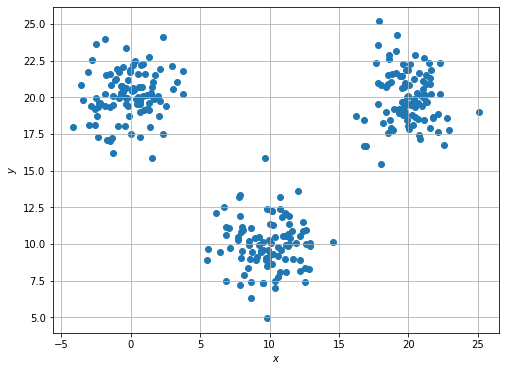

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [17]:
help(sc.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

In [23]:
Simx = sc.pdist(x)

In [24]:
MatSimx = sc.squareform(Simx)


In [25]:
MatSimx.shape

(300, 300)

In [26]:
MatSimx

array([[ 0.        ,  4.02837632,  2.68711892, ..., 15.91459356,
        13.69252056, 17.09485575],
       [ 4.02837632,  0.        ,  6.68816121, ..., 13.21679882,
        10.386375  , 14.18080664],
       [ 2.68711892,  6.68816121,  0.        , ..., 17.66707703,
        15.83901646, 18.95573387],
       ...,
       [15.91459356, 13.21679882, 17.66707703, ...,  0.        ,
         3.93342507,  1.55749947],
       [13.69252056, 10.386375  , 15.83901646, ...,  3.93342507,
         0.        ,  4.17828277],
       [17.09485575, 14.18080664, 18.95573387, ...,  1.55749947,
         4.17828277,  0.        ]])

In [27]:
DisMatSimx = pd.DataFrame(MatSimx)
DisMatSimx

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,4.028376,2.687119,1.452544,0.912156,1.496087,0.910264,4.240270,3.317876,0.542366,...,15.023898,14.130951,13.957073,13.192637,16.324341,16.892615,14.986498,15.914594,13.692521,17.094856
1,4.028376,0.000000,6.688161,4.576312,4.934733,3.375801,3.352276,7.741088,5.235087,3.593706,...,11.573958,10.956168,10.894097,10.093009,13.807082,14.108634,11.903799,13.216799,10.386375,14.180807
2,2.687119,6.688161,0.000000,3.002745,1.839268,3.591962,3.364419,2.363982,3.853693,3.190865,...,17.235742,16.194804,15.960478,15.232450,17.961307,18.678401,16.982084,17.667077,15.839016,18.955734
3,1.452544,4.576312,3.002745,0.000000,1.426453,2.889185,2.230409,5.092274,4.743549,1.351527,...,15.991149,15.201070,15.062432,14.282675,17.578332,18.087592,16.090284,17.127054,14.713734,18.256131
4,0.912156,4.934733,1.839268,1.426453,0.000000,2.221296,1.758926,3.697120,3.543489,1.366397,...,15.885652,14.959544,14.771239,14.014432,17.048533,17.656552,15.800065,16.668659,14.539258,17.877972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,16.892615,14.108634,18.678401,18.087592,17.656552,15.438358,15.984272,17.960287,14.939718,16.764815,...,4.374053,3.584110,3.389246,4.170755,1.409072,0.000000,2.585780,1.036118,4.405840,0.721526
296,14.986498,11.903799,16.982084,16.090284,15.800065,13.583174,14.077290,16.533097,13.391733,14.802409,...,2.084632,1.019702,1.029451,1.813984,3.220058,2.585780,0.000000,2.220791,1.822065,2.380827
297,15.914594,13.216799,17.667077,17.127054,16.668659,14.453221,15.007738,16.928623,13.917311,15.798371,...,4.252796,3.094949,2.766278,3.481050,1.002949,1.036118,2.220791,0.000000,3.933425,1.557499
298,13.692521,10.386375,15.839016,14.713734,14.539258,12.345527,12.791291,15.605864,12.409470,13.464004,...,1.508392,0.839234,1.259040,1.070148,4.897125,4.405840,1.822065,3.933425,0.000000,4.178283


In [28]:
z = hierarchy.linkage(x,metric='euclidean', method='ward')

In [29]:
z

array([[2.53000000e+02, 2.76000000e+02, 3.87241856e-02, 2.00000000e+00],
       [2.13000000e+02, 2.70000000e+02, 3.95681113e-02, 2.00000000e+00],
       [2.25000000e+02, 2.43000000e+02, 4.40299241e-02, 2.00000000e+00],
       ...,
       [5.88000000e+02, 5.91000000e+02, 1.98197761e+01, 1.00000000e+02],
       [5.94000000e+02, 5.95000000e+02, 1.42535640e+02, 2.00000000e+02],
       [5.96000000e+02, 5.97000000e+02, 1.84049586e+02, 3.00000000e+02]])

Text(0, 0.5, 'Distancia o medida de similitud')

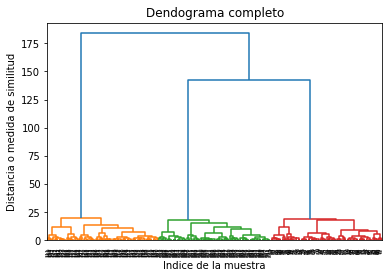

In [31]:
dn = hierarchy.dendrogram(z)
plt.title('Dendograma completo')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancia o medida de similitud')

## Criterios de selección de grupos


In [33]:
# Criterio del dendrograma
gruposmax = 3
grupos = hierarchy.fcluster(z,gruposmax, criterion='maxclust')


In [34]:
grupos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [36]:
x.shape, grupos.shape

((300, 2), (300,))

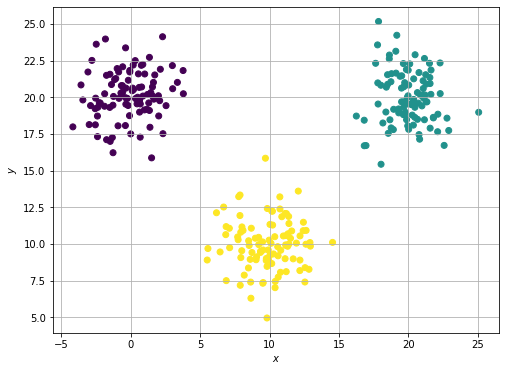

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=grupos)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [38]:
gruposmax = 5
grupos = hierarchy.fcluster(z,gruposmax, criterion='maxclust')
grupos

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4,
       5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4,
       4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5,
       5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 5, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

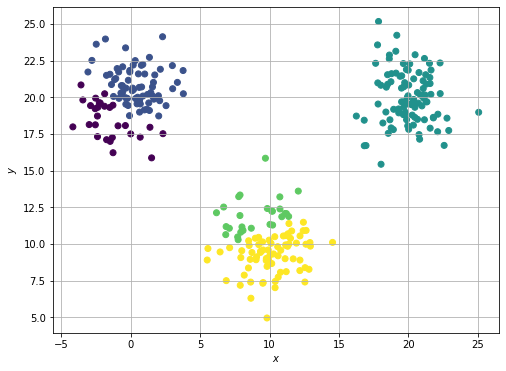

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=grupos)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [40]:
# Gráfica del codo
z.shape

(299, 4)

In [48]:
last = z[-10:,2]
last_rev = last[::-1]
idxs = np.arange(1,len(last_rev)+1)

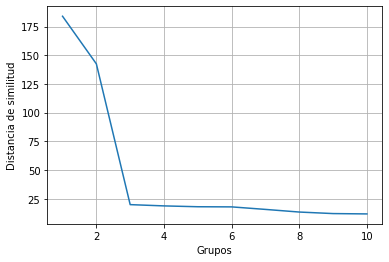

In [49]:
# Graficar critero del codo
plt.figure(figsize=(6,4))
plt.plot(idxs, last_rev)
plt.xlabel('Grupos')
plt.ylabel('Distancia de similitud')
plt.grid()
plt.show()

In [52]:
# Función que gener y grafique el criterio del codo
def criterio_codo(z,num_g = 15):
    last = z[-num_g:,2]
    last_rev = last[::-1]
    idxs = np.arange(1,len(last_rev)+1)
    
    #grupomax = np.argmax()
    #print(f'El número de grupos sugerido es: {grupomax}')
    
    # Graficar critero del codo
    plt.figure(figsize=(6,4))
    plt.plot(idxs, last_rev)
    plt.xlabel('Grupos')
    plt.ylabel('Distancia de similitud')
    plt.grid()
    plt.show()

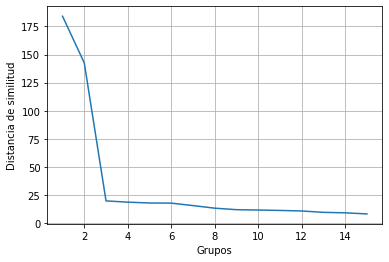

In [53]:
criterio_codo(z, 15)

### Criterio del gradiente


In [66]:
last = z[-15:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]
idxs = np.arange(1,len(last)+1)

In [65]:
last.shape

(15,)

In [62]:
grad_rev.shape

(14,)

In [63]:
idxs.shape

(14,)

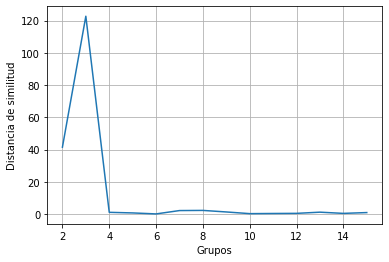

In [67]:
plt.figure(figsize=(6,4))
plt.plot(idxs[1:], grad_rev)
plt.xlabel('Grupos')
plt.ylabel('Distancia de similitud')
plt.grid()
plt.show()

In [68]:
def criterio_gradiente(z, num_g=15):
    last = z[-num_g:,2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]
    idxs = np.arange(1,len(last)+1)
    
    plt.figure(figsize=(6,4))
    plt.plot(idxs[1:], grad_rev)
    plt.xlabel('Grupos')
    plt.ylabel('Distancia de similitud')
    plt.grid()
    plt.show()

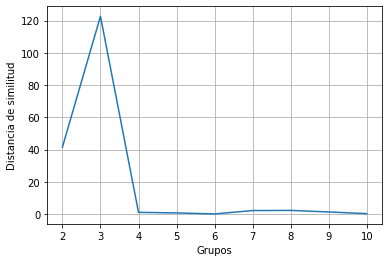

In [69]:
criterio_gradiente(z,10)

## Aplicar número de grupos opt

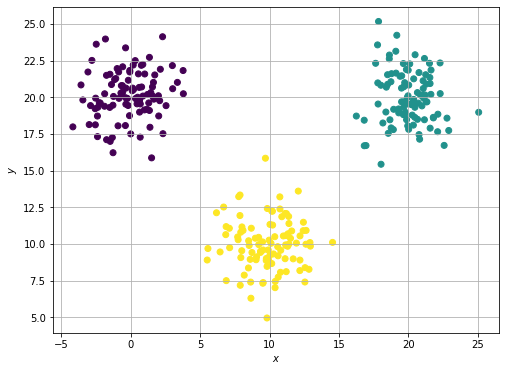

In [70]:
gruposmax = 3
grupos = hierarchy.fcluster(z,gruposmax, criterion='maxclust')

plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=grupos)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [72]:
data = pd.read_csv('Data/shopping-data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
data_clientes = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data_clientes.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


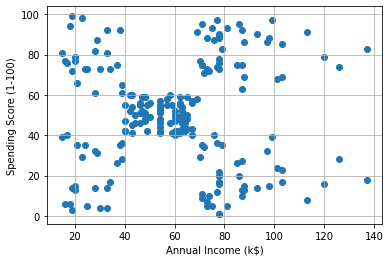

In [78]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,1],data_clientes.iloc[:,2])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

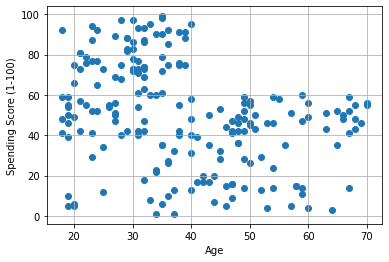

In [79]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,0],data_clientes.iloc[:,2])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

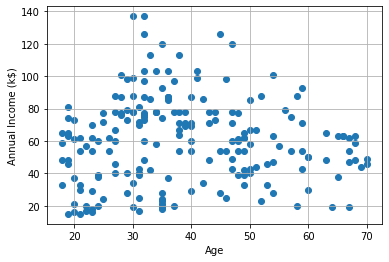

In [80]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,0],data_clientes.iloc[:,1])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid()
plt.show()

In [82]:
X_clientes = data_clientes.values
X_clientes

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [83]:
# Clustering Jerárquico
Z = hierarchy.linkage(X_clientes, metric='euclidean', method='complete')


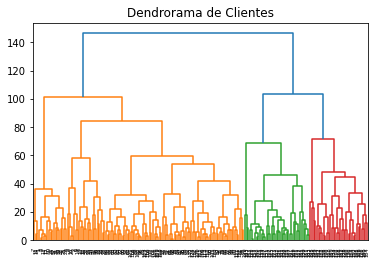

In [84]:
#Dendrograma
plt.figure(figsize=(6,4))
plt.title('Dendrorama de Clientes')
dend = hierarchy.dendrogram(Z)

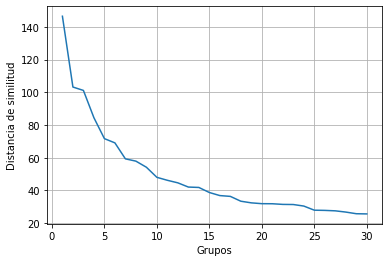

In [86]:
# 2do criterio (criterio del codo)
criterio_codo(Z,num_g=30)

In [ ]:
# 3er criterio (criterio del gradiente)
criterio_codo(Z,num_g=30)


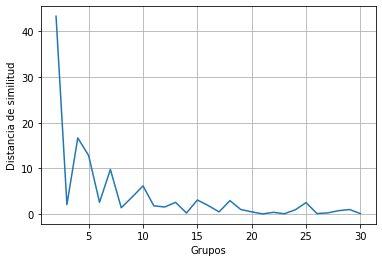

In [87]:
criterio_gradiente(Z, num_g=30)

In [88]:
grupomax=5
grupos = hierarchy.fcluster(Z,grupomax, criterion='maxclust')

In [89]:
grupos

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 5, 4, 5, 4, 5, 4,
       3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [90]:
data_clientes['Cluster'] = grupos
data_clientes

C:\Users\uie70742\AppData\Local\Temp/ipykernel_33340/2262162585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clientes['Cluster'] = grupos


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,1
2,20,16,6,2
3,23,16,77,1
4,31,17,40,2
...,...,...,...,...
195,35,120,79,4
196,45,126,28,5
197,32,126,74,4
198,32,137,18,5


In [91]:
data_clientes[data_clientes['Cluster']==2]

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
2,20,16,6,2
4,31,17,40,2
6,35,18,6,2
8,64,19,3,2
10,67,19,14,2
12,58,20,15,2
14,37,20,13,2
16,35,21,35,2
18,52,23,29,2


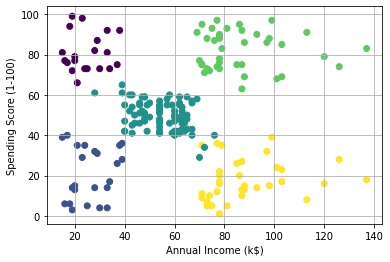

In [92]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,1],data_clientes.iloc[:,2], c=grupos)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

In [93]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


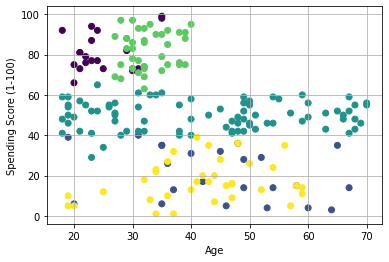

In [94]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,0],data_clientes.iloc[:,2], c=grupos)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

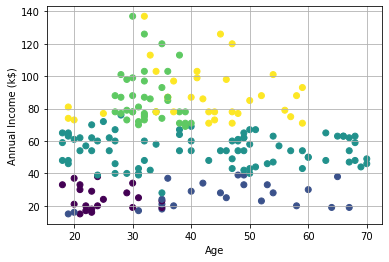

In [95]:
plt.figure(figsize=(6,4))
plt.scatter(data_clientes.iloc[:,0],data_clientes.iloc[:,1], c=grupos)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid()
plt.show()